In [1]:
import os,sys
CURRENT_TEST_DIR = os.getcwd()
sys.path.append(CURRENT_TEST_DIR + "/../new_iteration/")
import pickle
import numpy as np
import time
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

In [2]:
# Load df_latent
df_latent_all_epochs = pickle.load(open("df_latent_all_epochs_2000_BI.pkl", "rb"))
epochs = df_latent_all_epochs.shape[0]//192
print(df_latent_all_epochs.shape, epochs)
print(df_latent_all_epochs.head())

(384000, 86) 2000
   epoch  latentI_0  latentI_1  latentI_2  latentI_3  latentI_4  latentI_5  \
0    0.0   0.019704   0.147439   0.315583  -0.133822  -0.537159   0.416078   
1    0.0   0.201021   0.157615  -0.054110   0.038272  -0.280158   0.034905   
2    0.0   0.149628   0.297498   0.010813  -0.008037  -0.223241   0.539051   
3    0.0   0.073893   0.127700   0.096496   0.284279  -0.107116   0.120969   
4    0.0   0.228122  -0.129895   0.081472   0.214399  -0.279242  -0.184186   

   latentI_6  latentI_7  latentI_8  ...  latentB_35  latentB_36  latentB_37  \
0   0.354330  -0.079733  -0.286667  ...   -0.510566   -0.186886   -0.203534   
1  -0.524100  -0.276367  -0.447253  ...   -0.180413   -0.156488    0.147616   
2   0.296043   0.094903  -0.439657  ...   -0.476075   -0.312693   -0.108736   
3  -0.052709  -0.205540  -0.178356  ...   -0.237932   -0.911324    0.263747   
4  -0.173930  -0.224925  -0.326634  ...   -0.593293   -0.203978   -0.208784   

   latentB_38  latentB_39     y  laten

In [3]:
# create column names
latent_length = 40
latent_B_cols = ['latentB_'+str(i) for i in range(latent_length)]
latent_I_cols = ['latentI_'+str(i) for i in range(latent_length)]

In [4]:
# select the last epoch
epoch = 1999
df_latent = df_latent_all_epochs.loc[df_latent_all_epochs['epoch'] == epoch]
data_subset_B = df_latent[latent_B_cols].values
data_subset_I = df_latent[latent_I_cols].values

from sklearn import preprocessing
data_subset_B = preprocessing.scale(data_subset_B)
data_subset_I = preprocessing.scale(data_subset_I)

In [5]:
# create a dataframe for varying perplexity
tsne_columns = ['latentB_tsne-2d-one', 'latentB_tsne-2d-two', 'latentI_tsne-2d-one', 'latentI_tsne-2d-two']
df_tsne_all_perplexity = pd.DataFrame(columns=['perplexity', 'y']+tsne_columns)


num_sample = data_subset_B.shape[0]
y_column = df_latent['y']

perplexity_list = np.arange(5,150,10)
perplexity = 20
lr_list = [10, 50, 100, 200, 500, 1000]
# for perplexity in perplexity_list:
for lr in lr_list:
    
    # initiate and train tsne
    tsneB = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=5000, learning_rate=lr)
    tsne_results_B = tsneB.fit_transform(data_subset_B)
    tsneI = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=5000, learning_rate=lr)
    tsne_results_I = tsneI.fit_transform(data_subset_I)
    
    # create temp dataframe
#     perplexity_column = np.repeat(perplexity, num_sample)
    perplexity_column = np.repeat(lr, num_sample)
    tsne_array = np.concatenate((perplexity_column[:,None], y_column[:,None], tsne_results_B, tsne_results_I), axis=1)
    df_tsne = pd.DataFrame(tsne_array, columns=['perplexity', 'y']+tsne_columns)
    
    df_tsne_all_perplexity = df_tsne_all_perplexity.append(df_tsne)
    

print(df_tsne_all_perplexity.head())
print(df_tsne_all_perplexity.shape)


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.930046
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.851299
[t-SNE] KL divergence after 1750 iterations: 0.146969
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.973771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.117725
[t-SNE] KL divergence after 2100 iterations: 0.155423
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.930046
[t-SNE] KL divergence after 250 iteratio

In [6]:
# extract columns from dataframe
df_all_perplexity_B = df_tsne_all_perplexity[["perplexity", "y", "latentB_tsne-2d-one", "latentB_tsne-2d-two"]]
df_all_perplexity_I = df_tsne_all_perplexity[["perplexity", "y", "latentI_tsne-2d-one", "latentI_tsne-2d-two"]]
df_all_perplexity_B = df_all_perplexity_B.rename(columns={"perplexity":"perplexity", "y":"y","latentB_tsne-2d-one": "latent_tsne-2d-one", "latentB_tsne-2d-two": "latent_tsne-2d-two"})
df_all_perplexity_I = df_all_perplexity_I.rename(columns={"perplexity":"perplexity", "y":"y","latentI_tsne-2d-one": "latent_tsne-2d-one", "latentI_tsne-2d-two": "latent_tsne-2d-two"})


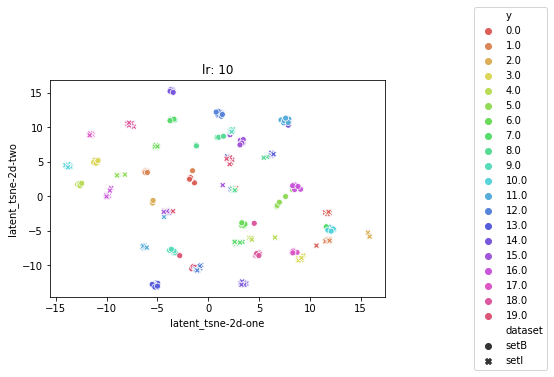

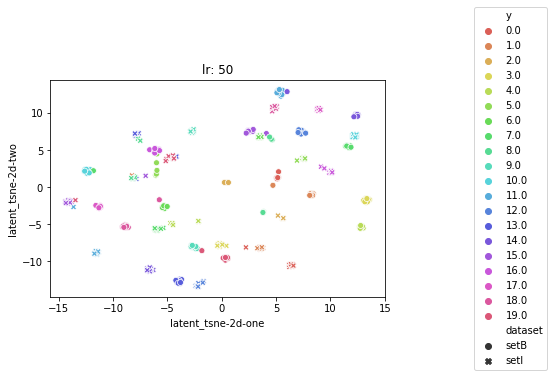

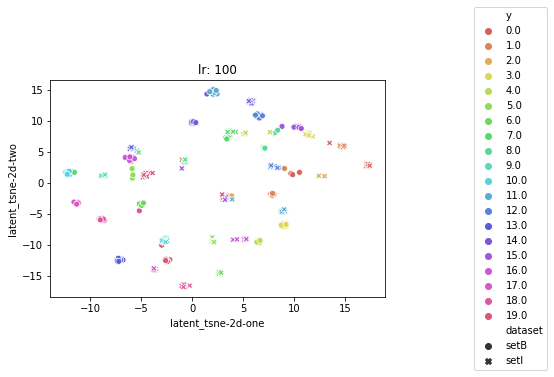

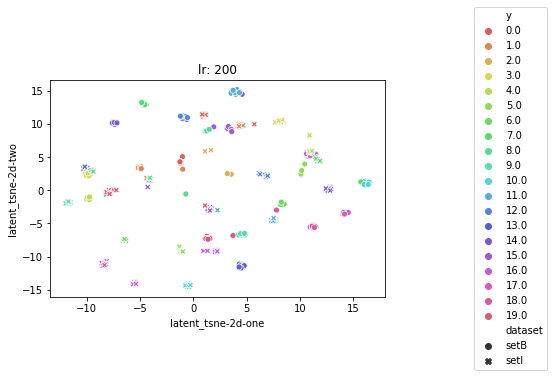

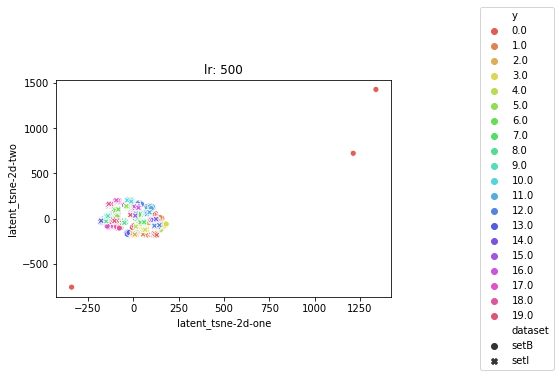

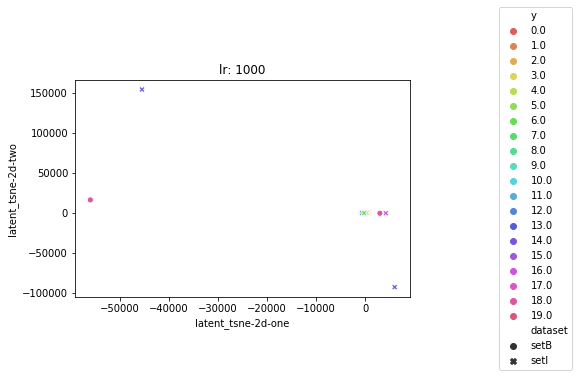

In [7]:
# plot tsne 
# for perplexity in perplexity_list:
for lr in lr_list:
    # print(epoch)
    subset_B = df_all_perplexity_B.loc[df_all_perplexity_B['perplexity'] == lr]
    subset_I = df_all_perplexity_I.loc[df_all_perplexity_I['perplexity'] == lr]
    concatenated = pd.concat([subset_B.assign(dataset='setB'), subset_I.assign(dataset='setI')])

    img = sns.scatterplot(
    x="latent_tsne-2d-one", y="latent_tsne-2d-two",
    hue="y",
    style="dataset",
    palette=sns.color_palette("hls", 20, desat=1),
    data=concatenated,
    legend="full",
    alpha=0.99)
    #set legend position
    img.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    # set title
#     img.set(title = 'Perplexity: {}'.format(perplexity))
    img.set(title = "lr: {}".format(lr))
    plt.show()